In [63]:
import pandas as pd
import numpy as np
import sqlite3
pd.set_option('display.max_columns', None)
import matplotlib as plt
import seaborn as sns
import re
import plotly.express as px
from scipy import stats

In [64]:
# connect to sqlite
conn = sqlite3.connect('data/liquor.db')
# make a cursor
cursor = conn.cursor()
# select data and transform it to df
#query = '''SELECT "Vendor name" FROM vendors where "Vendor number"=10;'''
query1 = '''SELECT * FROM vendors;'''
cursor.execute(query1)
result1 = cursor.fetchall()

cursor.close()
conn.close()

In [65]:
result1

[('10.0', 'A Hardy / U.S.A., Ltd.'),
 ('14.0', "Adamba Imports Int'l, Inc."),
 ('27.0', 'Anheuser-Busch/Longtail Libations'),
 ('33.0', 'Bmc Imports'),
 ('35.0', 'Bacardi U.S.A., Inc.'),
 ('51.0', 'Barrel House Distilling Co.'),
 ('55.0', 'Sazerac North America'),
 ('61.0', 'Biagio Cru And Estate Wines, LLC'),
 ('65.0', 'Jim Beam Brands'),
 ('68.0', 'Belmont Farms Of Va., Inc'),
 ('69.0', 'Bendistillery'),
 ('79.0', 'BRECKENRIDGE DISTILLERY'),
 ('80.0', 'Boston Beer Company'),
 ('82.0', 'BuzzBox Beverages'),
 ('85.0', 'Brown-Forman Corporation'),
 ('86.0', 'Broadbent Distillery'),
 ('89.0', 'Temperance Distiling Company'),
 ('90.0', 'CARRIAGE HOUSE IMPORTS'),
 ('91.0', 'Castle Brands'),
 ('100.0', 'Aiko Importers Inc'),
 ('101.0', 'ARTISAN GRAIN DISTILLERY'),
 ('102.0', 'Broadslab Distillery'),
 ('104.0', 'ASDSpirits, LLC'),
 ('107.0', 'Blaum Bros. Distilling Co.'),
 ('108.0', 'CVI Brands'),
 ('109.0', 'Casa 1921 LLC'),
 ('110.0', '3 Badge Mixology'),
 ('111.0', 'Better Brands Bev Co')

In [66]:
vendor = pd.DataFrame(result1, columns=['Vendor Number', 'Vendor Name'])
vendor.head()

,Vendor Number,Vendor Name
0,10.0,"A Hardy / U.S.A., Ltd."
1,14.0,"Adamba Imports Int'l, Inc."
2,27.0,Anheuser-Busch/Longtail Libations
3,33.0,Bmc Imports
4,35.0,"Bacardi U.S.A., Inc."


In [67]:
full_raw = pd.read_csv('data/Iowa_Liquor_Sales.csv',
                       dtype={'Zip Code': object, 'Item Number': object}, 
                       parse_dates=['Date'])

In [68]:
raw = full_raw.drop_duplicates()

In [69]:
price = raw[['Item Number', 'Date', 'State Bottle Retail', 'State Bottle Cost']]

In [70]:
price = price.groupby(['Item Number', 'Date']).agg({'State Bottle Retail':
                                            'mean','State Bottle Cost':'mean' }).reset_index()

In [71]:
price = price.drop_duplicates()

In [72]:
price.head()

,Item Number,Date,State Bottle Retail,State Bottle Cost
0,100001,2016-10-03,12.0,8.0
1,100001,2016-10-04,12.0,8.0
2,100001,2016-10-05,12.0,8.0
3,100001,2016-10-06,12.0,8.0
4,100001,2016-10-07,12.0,8.0


In [73]:
store =pd.read_csv('data/store.csv')

In [74]:
store.head()

,Store Number,Store Name,Address,City,Zip Code,Store Location,County Number,County,Store Type
0,2624,hy-vee #2 / dubuque,2395 nw arterial rd,dubuque,52002,POINT (-90.741064 42.516633),31.0,dubuque,Supermarket
1,4870,tobacco 4 less / bettendorf,1032 state st,bettendorf,52722,POINT (-90.518562 41.5251),82.0,scott,Liquor Tobacco Store
2,3847,logan ave convenience store,735 logan ave,waterloo,50703,POINT (-92.337744 42.510453),7.0,black hawk,Convenience Store
3,2601,hy-vee food store / fairfield,1300 west burlington ave,fairfield,52556,POINT (-91.978702 41.006456),51.0,jefferson,Supermarket
4,3908,county market #214 / fort madison,11802 avenue h,fort madison,52627,NaN,56.0,lee,Other Grocery or Convenience


In [75]:
product = pd.read_csv('data/product_clean_categorized.csv')

In [76]:
raw_select = raw[['Date','Store Number','Vendor Number', 'Item Number', 
     'State Bottle Cost','State Bottle Retail', 'Bottles Sold', 
     'Sale (Dollars)', 'Volume Sold (Liters)']]

In [77]:
# drop rows with missing vendor numbers
raw_select= raw_select.loc[~raw['Vendor Number'].isnull()]


In [78]:
# raw_select.loc[:,'Store Number']=raw_select['Store Number'].astype(object) 
# raw_select.loc[:,'Vendor Number']=raw_select['Vendor Number'].astype(object) 

In [79]:
# vendor.loc[:,'Vendor Number']=vendor['Vendor Number'].astype('Int64')
# vendor.loc[:,'Vendor Number']=vendor['Vendor Number'].astype(object) 

In [80]:
# clean = pd.merge(raw_select, vendor, how='left', on = 'Vendor Number')

In [81]:
clean = pd.merge(raw_select, store, how='left', on='Store Number')

In [82]:
clean = pd.merge(clean, product, how='left', 
                 left_on='Item Number', 
                 right_on='product_id').drop(['Unnamed: 0', 'product_id'], axis=1)

In [83]:
clean = clean.drop_duplicates()

In [84]:
clean.head()

,Date,Store Number,Vendor Number,Item Number,State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Store Name,Address,City,Zip Code,Store Location,County Number,County,Store Type,category_id,category_name,product_name,bottle_vol_ml,proof,category_new,imported
0,2012-05-30,2624,240.0,4356,32.41,48.62,2,97.24,1.5,hy-vee #2 / dubuque,2395 nw arterial rd,dubuque,52002,POINT (-90.741064 42.516633),31.0,dubuque,Supermarket,1012210.0,single malt scotch,balvenie 12yr doublewood single malt scotch,750.0,86.0,whisky,domestic
1,2013-10-14,4870,370.0,32231,5.87,8.81,1,8.81,0.5,tobacco 4 less / bettendorf,1032 state st,bettendorf,52722,POINT (-90.518562 41.5251),82.0,scott,Liquor Tobacco Store,1041100.0,american dry gins,seagrams extra dry gin mini,500.0,80.0,gin,domestic
2,2012-10-23,3847,205.0,52594,2.93,4.40,24,105.60,9.0,logan ave convenience store,735 logan ave,waterloo,50703,POINT (-92.337744 42.510453),7.0,black hawk,Convenience Store,1051010.0,american grape brandies,e & j vs brandy,375.0,80.0,brandy,domestic
3,2013-12-16,2601,205.0,52582,7.00,10.50,2,21.00,1.5,hy-vee food store / fairfield,1300 west burlington ave,fairfield,52556,POINT (-91.978702 41.006456),51.0,jefferson,Supermarket,1051010.0,american grape brandies,e & j vsop superior reserve,750.0,80.0,brandy,domestic
4,2013-09-23,3908,259.0,52318,11.83,17.74,6,106.44,10.5,county market #214 / fort madison,11802 avenue h,fort madison,52627,NaN,56.0,lee,Other Grocery or Convenience,1051010.0,american grape brandies,christian bros brandy,1750.0,80.0,brandy,domestic


In [112]:
clean.columns

Index(['Date', 'Store Number', 'Vendor Number', 'Item Number',
       'State Bottle Cost', 'State Bottle Retail', 'Bottles Sold',
       'Sale (Dollars)', 'Volume Sold (Liters)', 'Store Name', 'Address',
       'City', 'Zip Code', 'Store Location', 'County Number', 'County',
       'Store Type', 'category_id', 'category_name', 'product_name',
       'bottle_vol_ml', 'proof', 'category_new', 'imported'],
      dtype='object')

In [85]:
#clean.to_csv('data/clean.csv', index=False)

# EDA

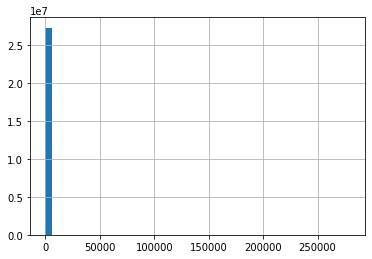

In [86]:
clean['Sale (Dollars)'].hist(bins=50)

In [87]:
# stats.ttest_ind()


    Store Analysis:
- Categorize the retail liquor stores into different types, chain-super market, specialized liquor stores, convenience stores, news stands, tobacco stores,..... and report the relevant statistics.
- New stores pop up and some of them shut down after a few years. Analyze the store opening dynamics and report the findings on store life-cycle, store survival analysis, survial curve, survival probabilities, etc. Refine your findings based on the store categories you design. Is it easy for the stores to experience sales volume growth? With new stores popping up for competition, how does it affect the sales of the existing stores?
- Does the pie (Gross sales volume in Iowa) grow bigger? Do the stores share the bigger pie? Does the winner take all or more players share smaller slices?
- In terms of store inventories, report the varieties of product/product category for different store types. What product/product category are the major sales contributors for 
- Study the monthly sales volumes and gross profits (without taking price-discounts into account) of the stores.
- Use the county population information, say https://www.iowa-demographics.com/counties_by_population, to estimate the stores-per-capita in different counties. Use the chain-supermarket Hy-Vee as a case study, depict its store distribution in different counties of Iowa and the their liquor sales dynamics.




In [88]:
clean.describe()

,Store Number,Vendor Number,State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),County Number,category_id,bottle_vol_ml,proof
count,2.737300e+07,2.737300e+07,2.737298e+07,2.737298e+07,2.737300e+07,2.737298e+07,2.737300e+07,2.479348e+07,2.736861e+07,2.737293e+07,2.716614e+07
mean,3.658671e+03,2.600057e+02,9.889250e+00,1.484828e+01,1.032626e+01,1.350975e+02,9.139945e+00,5.648388e+01,1.046870e+06,9.125117e+02,7.223465e+01
std,1.029295e+03,1.400562e+02,1.138777e+01,1.708153e+01,2.910322e+01,4.945718e+02,3.582560e+01,2.737230e+01,6.805923e+04,6.218271e+02,1.765816e+01
min,2.106000e+03,1.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.012200e+05,0.000000e+00,0.000000e+00
25%,2.611000e+03,1.150000e+02,5.490000e+00,8.250000e+00,2.000000e+00,3.006000e+01,1.500000e+00,3.100000e+01,1.012200e+06,7.500000e+02,7.000000e+01
50%,3.728000e+03,2.600000e+02,8.000000e+00,1.214000e+01,6.000000e+00,6.936000e+01,4.500000e+00,5.900000e+01,1.031200e+06,7.500000e+02,8.000000e+01
75%,4.504000e+03,3.800000e+02,1.200000e+01,1.800000e+01,1.200000e+01,1.350000e+02,1.050000e+01,7.700000e+01,1.062310e+06,1.000000e+03,8.000000e+01
max,9.938000e+03,9.870000e+02,7.680000e+03,1.152000e+04,1.500000e+04,2.795573e+05,1.500000e+04,9.900000e+01,1.901200e+06,3.780000e+05,1.900000e+02


In [89]:
clean.groupby('Store Type').describe()

Store Number                                    \
                                    count         mean          std     min   
Store Type                                                                    
0.0                             1481143.0  4504.003940   822.078324  2161.0   
Casino                            43235.0  3902.181959   518.238217  3521.0   
Convenience Store               4289029.0  4632.876841   595.156283  2130.0   
Drug Store                      1700347.0  2941.846675   708.720877  2503.0   
Liquor Tobacco Store            8511664.0  3704.583326  1075.653938  2106.0   
Other Grocery or Convenience    1331253.0  4165.588574   783.479897  2113.0   
Supermarket                    10016329.0  3130.756999   760.440792  2152.0   

                                                             Vendor Number  \
                                 25%     50%     75%     max         count   
Store Type                                                                   
0.0                           3858.0  4743.0  5126.0  9936.0     1481143.0   
Casino                        3521.0  3521.0  4337.0  5161.0       43235.0   
Convenience Store             4405.0  4626.0  5040.0  6057.0     4289029.0   
Drug Store                    2588.0  2614.0  2835.0  5096.0     1700347.0   
Liquor Tobacco Store          2604.0  3820.0  4604.0  9938.0     8511664.0   
Other Grocery or Convenience  3732.0  4166.0  4847.0  6022.0     1331253.0   
Supermarket                   2565.0  2648.0  3769.0  6036.0    10016329.0   

                                                                          \
                                    mean         std   min    25%    50%   
Store Type                                                                 
0.0                           260.629802  142.433676  10.0  115.0  260.0   
Casino                        241.836868  146.153608  35.0   65.0  260.0   
Convenience Store             258.688572  130.146169  10.0  115.0  260.0   
Drug Store                    259.177482  140.780656  10.0  115.0  260.0   
Liquor Tobacco Store          259.659268  140.774761  10.0  115.0  260.0   
Other Grocery or Convenience  259.087491  142.319973  10.0  115.0  260.0   
Supermarket                   261.112773  142.691130  10.0  115.0  260.0   

                                           State Bottle Cost             \
                                75%    max             count       mean   
Store Type                                                                
0.0                           380.0  987.0         1481143.0   9.740924   
Casino                        370.0  978.0           43235.0  15.385371   
Convenience Store             380.0  987.0         4289029.0   8.248688   
Drug Store                    380.0  987.0         1700342.0   9.779279   
Liquor Tobacco Store          380.0  987.0         8511659.0  10.142238   
Other Grocery or Convenience  389.0  987.0         1331253.0   9.296587   
Supermarket                   384.0  987.0        10016324.0  10.472410   

                                                                           \
                                    std  min   25%    50%    75%      max   
Store Type                                                                  
0.0                            8.037895  0.0  5.33   8.00  11.99  1749.12   
Casino                        12.208372  0.0  8.66  13.86  18.89  1399.29   
Convenience Store              6.321153  0.0  4.67   7.00  10.00  1749.12   
Drug Store                    16.862653  0.0  5.51   8.20  11.84  5800.00   
Liquor Tobacco Store           8.886410  0.0  5.37   8.20  12.50  6468.00   
Other Grocery or Convenience   6.909323  0.0  5.51   7.84  11.49  1599.19   
Supermarket                   14.270284  0.0  6.49   8.66  12.59  7680.00   

                             State Bottle Retail                             \
                                           count       mean        std  min   
Store Type      

In [90]:
# store_type_vol = clean.groupby(['Store Type', 
#                                 pd.Grouper(key='Date', 
#                                            freq='M')])[['Volume Sold (Liters)']].sum()

In [91]:
# store_type_vol = clean.groupby(['Store Type', 
#                                 pd.Grouper(key='Date', 
#                                            freq='M')])[['Volume Sold (Liters)']].sum()

# store_type_vol.reset_index(inplace=True)

# store_type_vol_p = store_type_vol.pivot(index='Date', 
#                                         columns = 'Store Type', 
#                                         values = 'Volume Sold (Liters)')

# store_type_vol_p.reset_index(inplace=True)

# store_type_vol_p

In [ ]:
clean.head(1)

## Try Downsampling

### Test sampling code

In [33]:
y= pd.DataFrame({'a':[1,2,3,4,5,6,7,8,9,10], 'b':[4,5,6,7,8,9,10,11,12,13]})
y

,a,b
0,1,4
1,2,5
2,3,6
3,4,7
4,5,8
5,6,9
6,7,10
7,8,11
8,9,12
9,10,13


In [47]:
np.random.seed(7)
rand =np.random.choice(y.index, size=4, replace=False)
rand

array([8, 5, 0, 2])

In [48]:
y.iloc[rand]

,a,b
8,9,12
5,6,9
0,1,4
2,3,6


In [102]:
clean.loc[:,:] = clean.reset_index()

In [103]:
samp_size = int(1e5)

In [104]:
np.random.seed(7)
clean_rand = np.random.choice(clean.index, size=samp_size, replace=False)


In [105]:
clean_rand.sort()

In [106]:
clean_rand.max()

27372181

In [107]:
clean.shape

(27373000, 24)

In [108]:
clean.iloc[clean_rand]

,Date,Store Number,Vendor Number,Item Number,State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Store Name,Address,City,Zip Code,Store Location,County Number,County,Store Type,category_id,category_name,product_name,bottle_vol_ml,proof,category_new,imported
20,2015-02-12,3456,259.0,18120,14.97,22.46,1,22.46,0.75,quick shop / clear lake,904 n 8th st,clear lake,50428,POINT (-93.378772 43.142868),17.0,cerro gord,Convenience Store,1011250.0,single barrel bourbon whiskies,evan williams vintage,750.0,86.0,whisky,domestic
586,2012-10-30,4500,35.0,43126,7.53,11.30,6,67.80,4.50,casey's general store #2788 / north liberty,595 n kansas ave,north liberty,52317,POINT (-91.636952 41.751925),52.0,johnson,Convenience Store,1062200.0,puerto rico & virgin islands rum,bacardi superior rum,750.0,80.0,rum,domestic
839,2014-08-29,3612,434.0,41846,9.00,13.50,2,27.00,1.50,b and c liquor / maquoketa,509 e platt,maquoketa,52060,POINT (-90.659692 42.06922000000001),49.0,jackson,Liquor Tobacco Store,1101100.0,american alcohol,everclear alcohol,750.0,151.0,other,domestic
919,2012-02-02,2637,301.0,38176,9.64,14.46,4,57.84,3.00,hy-vee #5 / davenport,2351 w locust,davenport,52804,POINT (-90.611972 41.538207),NaN,NaN,Supermarket,1031100.0,american vodkas,titos handmade vodka,750.0,80.0,vodka,domestic
1279,2012-05-17,2579,115.0,11776,5.23,7.84,12,94.08,9.00,hy-vee food store / grinnell,320 west street south,grinnell,50112,POINT (-92.727343 41.7283),79.0,poweshiek,Supermarket,1012100.0,canadian whiskies,black velvet,750.0,80.0,whisky,domestic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27371496,2012-10-02,2616,260.0,25606,6.53,9.79,12,117.48,9.00,hy-vee food and drug / clinton,901 south 4th st,clinton,52732,POINT (-90.193204 41.836268000000004),23.0,clinton,Drug Store,1011100.0,blended whiskies,seagrams 7 crown bl whiskey,750.0,80.0,whisky,domestic
27371524,2014-06-03,4239,260.0,10008,10.50,15.74,6,94.44,10.50,fareway stores #850 / spirit lake,1906 keokuk,spirit lake,51360,POINT (-95.106219 43.42157),30.0,dickinson,Supermarket,1012200.0,scotch whiskies,scoresby rare scotch,1750.0,80.0,whisky,domestic
27371718,2014-05-01,3565,259.0,35416,4.84,7.26,12,87.12,9.00,hartig drug store #10,701 mormon trek blvd,iowa city,52246,POINT (-91.574025 41.651984),52.0,johnson,Drug Store,1031080.0,vodka 80 proof,burnett's vodka 80 prf,750.0,80.0,vodka,domestic
27372036,2013-04-17,3013,205.0,52596,5.75,8.62,3,25.86,2.25,keith's foods,207 e locust st,bloomfield,52537,POINT (-92.412847 40.752691),26.0,davis,Other Grocery or Convenience,1051010.0,american grape brandies,e & j vs,750.0,80.0,brandy,domestic


# MBA

In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import mlxtend as ml
import sqlite3

In [101]:
conn = sqlite3.connect("data/liquor.db")
query = '''
SELECT "Store Number", "Store Name", County
FROM stores
LIMIT(1000)
'''
df2 = pd.read_sql_query(query, conn)
conn.close()


In [103]:
df2['Store Name'].loc[df2['Store Name'].str.contains("y")]


2                      sycamore convenience
7                 central city liquor, inc.
16                           john's grocery
20                        spencer's grocery
30                     anamosa family foods
                       ...                 
988                     osage payless foods
989    casey's general store #2914 / harlan
991    casey's general store #2989 / mechan
994              kum & go #228 / sioux city
997                select mart   floyd blvd
Name: Store Name, Length: 486, dtype: object

In [95]:
conn = sqlite3.connect("data/liquor.db")
query = '''
SELECT Date, t."Store Number", "Store Type", p.product_name, category_new, "Volume Sold", County
FROM transactions AS t
LEFT JOIN stores AS s ON t."Store Number" = s."Store Number"
LEFT JOIN products AS p ON t."Item Number" = p."Item Number"
'''
df = pd.read_sql_query(query, conn)
conn.close()
df.head(3)

,Date,Store Number,Store Type,product_name,category_new,Volume Sold,County
0,2012-05-03 00:00:00,2636,Liquor Tobacco Store,nikolai vodka,vodka,21.0,polk
1,2012-07-05 00:00:00,3735,Liquor Tobacco Store,kessler blend whiskey,whisky,1.2,buchanan
2,2012-03-06 00:00:00,4631,Other,uv cake vodka,vodka,9.0,black hawk


In [4]:
df.shape

(19445831, 7)

In [128]:
# Make Date column datetime
df.loc[:,'Date']=pd.to_datetime(df.Date)


### Subset df by filtering only most popular items and longest running stores

In [4]:
# Most Popular Items
# Want the top 200 # 9587 Items Total
top200 = df.groupby(['product_name']
                   ).agg({'Volume Sold': 'sum'}
                        ).sort_values(by= 'Volume Sold', 
                                      ascending= False
                                     ).reset_index()[0:200]['product_name'].tolist()

# Get longevity
long_g = df.groupby(['Store Number']
                   ).agg({'Date': (lambda x: (max(x)-min(x)).days)}
                        ).sort_values(by='Date',ascending=False
                                     ).reset_index()
# 3129 Days is the 75% longevity percentile (3163 max). 
# 614 stores out of 2448 stores total will be included in MBA
long_store = long_g.loc[long_g.Date >= 3129]['Store Number'].tolist()

# Filter the popular items and longest running stores
# 5443606 rows × 7 columns
df = df.loc[df['Store Number'].isin(long_store)]
df = df.loc[df['product_name'].isin(top200)]
df.head(3)

,Date,Store Number,Store Type,product_name,category_new,Volume Sold,County
0,2012-05-03,2636,Liquor Tobacco Store,nikolai vodka,vodka,21.0,polk
5,2013-08-05,3833,Supermarket,jagermeister liqueur,liqueur,18.0,cass
7,2014-04-28,4626,Convenience Store,paramount white rum,rum,9.0,pottawatta


In [89]:
df.shape

(7952034, 7)

In [23]:
top200[0:10]

['black velvet',
 'hawkeye vodka',
 'captain morgan spiced rum',
 "five o'clock vodka",
 'titos handmade vodka',
 'barton vodka',
 'fireball cinnamon whiskey',
 'jack daniels old #7 black lbl',
 'phillips vodka',
 'mccormick vodka pet']

In [182]:
df.groupby('Store Type').agg({'product_name':lambda x: "%s" % ':'.join(x)})

,product_name
Store Type,
Convenience Store,paramount white rum:christian bros brandy
Liquor Tobacco Store,nikolai vodka:kessler blend whiskey:pama pomeg...
Other,uv cake vodka
Other Grocery or Convenience,windsor canadian pet:paramount creme de menthe...
Supermarket,captain morgan parrot bay coconut:jagermeister...


In [211]:
df = df.replace(',','', regex=True)

In [238]:
pd.Series(df.head(1000).groupby([pd.Grouper(key='Date',
                                freq='M'
                               ),
                     'Store Number',
                     'product_name']).size().reset_index(name='count').groupby([pd.Grouper(key='Date',
                                freq='M'),
                     'Store Number']).agg({'product_name':lambda x: "['%s']" % ','.join(x)})['product_name'])#.str.len()

Date        Store Number
2012-01-31  2190                               ['absolut mandrin']
            2498                         ['christian bros brandy']
            2515                                      ['e & j xo']
            2593            ['dr. mcgillicuddy's cherry schnapps']
            2661            ['bushmills black bush irish whiskey']
                                             ...                  
2016-08-31  5155                       ['new amsterdam red berry']
            5210                      ['ketel one imported vodka']
            5215                ['captain morgan original spiced']
            5223                      ['fireball cinnamon whisky']
            5250                                 ['remy martin v']
Name: product_name, Length: 974, dtype: object

In [240]:
pd.Series([['as s', 's'],['sdf s']])#.str.len()

0    [as s, s]
1      [sdf s]
dtype: object

In [198]:
df.head(1000).groupby([pd.Grouper(key='Date',
                                freq='M'
                               ),
                     'Store Number',
                     'product_name']).size().reset_index(name='count').groupby([pd.Grouper(key='Date',
                                freq='M'),
                     'Store Number']).agg({'product_name':lambda x: "%s" % ':'.join(x)})

product_name
Date       Store Number                                    
2012-01-31 2190                             absolut mandrin
           2498                       christian bros brandy
           2515                                    e & j xo
           2593          dr. mcgillicuddy's cherry schnapps
           2661          bushmills black bush irish whiskey
...                                                     ...
2016-08-31 5155                     new amsterdam red berry
           5210                    ketel one imported vodka
           5215              captain morgan original spiced
           5223                    fireball cinnamon whisky
           5250                               remy martin v

[974 rows x 1 columns]

In [212]:
# no : can use to separate product names
df.head(210000)['product_name'].str.contains(',').sum()

0

### Overall MBA

In [5]:
df_all = df[['Date', 'Store Number', 'product_name']].groupby([pd.Grouper(key='Date',
                                freq='M'
                               ),
                     'Store Number',
                     'product_name']
                   ).size().reset_index(name='count')

In [100]:
df_all.head()


,Date,Store Number,product_name,count
0,2012-01-31,2106,absolut citron (lemon vodka),1
1,2012-01-31,2106,absolut swedish vodka 80 prf,3
2,2012-01-31,2106,admiral nelson spiced rum,4
3,2012-01-31,2106,arrow peppermint schnapps,1
4,2012-01-31,2106,bacardi dragon berry,1


In [94]:
df.shape

(7952034, 7)

In [6]:
basket = (df_all.groupby([pd.Grouper(key='Date', freq='M'),'Store Number','product_name'])['count'].sum().unstack().reset_index().fillna(0)).set_index(['Date','Store Number'])#The encoding function

In [105]:
basket.head()

product_name             absolut citron (lemon vodka)  \
Date       Store Number                                 
2012-01-31 2106                                   1.0   
           2130                                   1.0   
           2178                                   1.0   
           2190                                  16.0   
           2191                                   3.0   

product_name             absolut swedish vodka 80 prf  \
Date       Store Number                                 
2012-01-31 2106                                   3.0   
           2130                                   4.0   
           2178                                   0.0   
           2190                                  23.0   
           2191                                   4.0   

product_name             admiral nelson spiced rum  \
Date       Store Number                              
2012-01-31 2106                                4.0   
           2130                                1.0   
           2178                                0.0   
           2190                                7.0   
           2191                                3.0   

product_name             admiral nelson spiced rum traveler  \
Date       Store Number                                       
2012-01-31 2106                                         0.0   
           2130                                         0.0   
           2178                                         0.0   
           2190                                         0.0   
           2191                                         0.0   

product_name             ancient age bourbon  arrow peppermint schnapps  \
Date       Store Number                                                   
2012-01-31 2106                          0.0                        1.0   
           2130                          0.0                        4.0   
           2178                          1.0                        0.0   
           2190                          2.0                        3.0   
           2191                          3.0                        9.0   

product_name             bacardi dragon berry  bacardi gold rum  \
Date       Store Number                                           
2012-01-31 2106                           1.0               0.0   
           2130                           0.0               0.0   
           2178                           1.0               0.0   
           2190                           9.0               9.0   
           2191                           1.0               2.0   

product_name             bacardi limon  bacardi superior pet  \
Date       Store Number                                        
2012-01-31 2106                    4.0                   0.0   
           2130                    3.0                   0.0   
           2178                    0.0                   0.0   
           2190                   16.0                   0.0   
           2191                    1.0                   0.0   

product_name             bacardi superior rum  bacardi superior rum pet  \
Date       Store Number                                                   
2012-01-31 2106                           8.0                       0.0   
           2130                           4.0                       0.0   
           2178                           0.0                       0.0   
           2190                          21.0                       0.0   
           2191                           3.0                       0.0   

product_name             bailey's original irish cream  barton gin  \
Date       Store Number                                              
2012-01-31 2106                                    3.0         2.0   
           2130                                    3.0         1.0   
           2178                                    0.0         0.0   
           2190                                   17.0    

In [7]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1
basket_sets = basket.applymap(encode_units)

In [29]:
frequent_itemsets = apriori(basket_sets, min_support=0.5, use_colnames=True, max_len=2)

In [112]:
frequent_itemsets.head()

,support,itemsets
0,0.708292,(absolut swedish vodka 80 prf)
1,0.700455,(admiral nelson spiced rum)
2,0.412380,(bacardi limon)
3,0.710417,(bacardi superior rum)
4,0.439522,(bailey's original irish cream)


In [30]:
rules = association_rules(frequent_itemsets, metric="lift")
# rules.sort_values('confidence', ascending = False, inplace = True)
# rules.head(10)

In [31]:
rules.sort_values('confidence', ascending = False, inplace = True)
rules.shape

(260, 9)

- Note: Hawkeye brand made in Missouri marketed towards residents of Iowa, which is known as "the Hawkeye State". Products sold under the Hawkeye name include blended whiskey, rum, gin, flavored vodka, and the most popular product – vodka
- Black Velvet (whiskey) is the most popular alcohol in iowa


In [22]:
rules.loc[(rules.confidence >.90)&(rules.support >.55)].sort_values('lift', ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
204,(paramount white rum),(hawkeye vodka),0.638763,0.850981,0.596916,0.934487,1.098129,0.053341,2.274656
40,(admiral nelson spiced rum),(hawkeye vodka),0.700455,0.850981,0.650153,0.928186,1.090725,0.054079,2.075079
203,(malibu coconut rum),(hawkeye vodka),0.639826,0.850981,0.587446,0.918134,1.078912,0.042966,1.820269
215,(uv blue (raspberry) vodka),(hawkeye vodka),0.647187,0.850981,0.589048,0.910167,1.069550,0.038304,1.658846
200,(jose cuervo especial reposado tequila),(hawkeye vodka),0.621504,0.850981,0.564698,0.908599,1.067708,0.035810,1.630385
209,(smirnoff vodka 80 prf),(hawkeye vodka),0.666857,0.850981,0.601548,0.902065,1.060029,0.034065,1.521607
12,(absolut swedish vodka 80 prf),(hawkeye vodka),0.708292,0.850981,0.638446,0.901389,1.059234,0.035703,1.511172
64,(bacardi superior rum),(hawkeye vodka),0.710417,0.850981,0.640254,0.901237,1.059056,0.035703,1.508854
167,(fireball cinnamon whiskey),(hawkeye vodka),0.685703,0.850981,0.617871,0.901078,1.058870,0.034352,1.506429
196,(jagermeister liqueur),(hawkeye vodka),0.613144,0.850981,0.551992,0.900264,1.057913,0.030217,1.494132


## Store Type

In [139]:
def mba_org(store_t, df1=df, min_s=0.5, max_l=2):
    df = df1.loc[df1['Store Type']==store_t].groupby([pd.Grouper(key='Date',freq='M'),'Store Number','product_name']).size().reset_index(name='count')

    basket = (df.groupby([pd.Grouper(key='Date', 
                                               freq='M'
                                              ),
                                    'Store Number',
                                    'product_name'
                                   ])['count'].sum().unstack().reset_index().fillna(0)).set_index(['Date',
                                                                                                   'Store Number'])

    basket_sets = basket.applymap(encode_units)

    frequent_itemsets = apriori(basket_sets, min_support=min_s, use_colnames=True, max_len=max_l)

    rules = association_rules(frequent_itemsets, metric="lift")
    
    return rules, frequent_itemsets

#### Define function to filter for store type and season and run mba

In [166]:
def mba(store_t=None, season=None, df1=df, min_s=0.5, max_l=2):
    if store_t == None:
        df = df1.loc[df1['Month'].isin(season)
                        ].groupby([pd.Grouper(key='Date',
                                              freq='M'
                                             ),
                                   'Store Number',
                                   'product_name'
                                  ]).size().reset_index(name='count')
        print('Season')
    elif season == None:
        df = df1.loc[df1['Store Type']==store_t
                    ].groupby([pd.Grouper(key='Date',
                                          freq='M'
                                         ),
                               'Store Number',
                               'product_name'
                              ]).size().reset_index(name='count')
        print('Store Type')
    else:
        return None

    basket = (df.groupby([pd.Grouper(key='Date', 
                                               freq='M'
                                              ),
                                    'Store Number',
                                    'product_name'
                                   ])['count'].sum().unstack().reset_index().fillna(0)).set_index(['Date',
                                                                                                   'Store Number'])

    basket_sets = basket.applymap(encode_units)

    frequent_itemsets = apriori(basket_sets, min_support=min_s, use_colnames=True, max_len=max_l)

    rules = association_rules(frequent_itemsets, metric="lift")
    
    return rules, frequent_itemsets


In [68]:
df.loc[df['Store Type']=='Supermarket'].shape

(4094216, 7)

In [73]:
df.loc[df['Store Type']=='Liquor Tobacco Store'].shape

(2030640, 7)

In [67]:
df.loc[df['Store Type']=='Convenience Store'].shape

(778505, 7)

In [71]:
df.loc[df['Store Type']=='Drug Store'].shape

(535619, 7)

In [69]:
df.loc[df['Store Type']=='Casino'].shape

(16073, 7)

#### SUPERMARKETS

In [168]:
rules_groc, frequent_itemsets_groc = mba(store_t='Supermarket')
rules_groc.loc[(rules_groc.confidence >.90)&(rules_groc.support >.55)].sort_values('lift', ascending = False).head(20)

Store Type


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
429,(jagermeister liqueur),(seagrams 7 crown bl whiskey),0.604863,0.855349,0.559048,0.924256,1.080561,0.041679,1.909739
511,(ten high),(seagrams 7 crown bl whiskey),0.605790,0.855349,0.556057,0.917905,1.073136,0.037896,1.761999
459,(jose cuervo authentic lime margarita),(seagrams 7 crown bl whiskey),0.665421,0.855349,0.607943,0.913622,1.068128,0.038776,1.674630
501,(phillips vodka),(seagrams 7 crown bl whiskey),0.616406,0.855349,0.562248,0.912139,1.066394,0.035006,1.646359
469,(jose cuervo especial reposado tequila),(seagrams 7 crown bl whiskey),0.682885,0.855349,0.622118,0.911014,1.065079,0.038013,1.625549
491,(paramount white rum),(seagrams 7 crown bl whiskey),0.765394,0.855349,0.694967,0.907986,1.061539,0.040289,1.572063
515,(uv blue (raspberry) vodka),(seagrams 7 crown bl whiskey),0.738180,0.855349,0.670176,0.907876,1.061410,0.038774,1.570174
341,(five star),(seagrams 7 crown bl whiskey),0.634708,0.855349,0.576004,0.907510,1.060983,0.033108,1.563975
477,(malibu coconut rum),(seagrams 7 crown bl whiskey),0.747271,0.855349,0.676486,0.905275,1.058369,0.037308,1.527060
77,(admiral nelson spiced rum),(seagrams 7 crown bl whiskey),0.779389,0.855349,0.703669,0.902847,1.055531,0.037020,1.488905


In [149]:
frequent_itemsets_groc.sort_values(by='support', ascending=False).head(20)

,support,itemsets
4,0.933610,(black velvet)
17,0.916594,(hawkeye vodka)
120,0.867490,"(black velvet, hawkeye vodka)"
33,0.855349,(seagrams 7 crown bl whiskey)
14,0.829810,(five o'clock vodka)
136,0.814199,"(seagrams 7 crown bl whiskey, black velvet)"
232,0.804031,"(seagrams 7 crown bl whiskey, hawkeye vodka)"
117,0.788092,"(black velvet, five o'clock vodka)"
1,0.779389,(admiral nelson spiced rum)
18,0.778462,(jack daniels old #7 black lbl)


#### LIQUOR STORES

In [150]:
rules_liq, frequent_itemsets_liq = mba(store_t='Liquor Tobacco Store')
rules_liq.loc[(rules_liq.confidence >.90)&(rules_liq.support >.55)].sort_values('lift', ascending = False).head(20)

Season


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
267,(dr. mcgillicuddy's cherry schnapps),(jack daniels old #7 black lbl),0.613778,0.801633,0.554859,0.904006,1.127705,0.062834,2.066448
411,(malibu coconut rum),(jack daniels old #7 black lbl),0.680366,0.801633,0.613417,0.901598,1.124702,0.068013,2.015883
307,(five star),(five o'clock vodka),0.616710,0.820716,0.563972,0.914484,1.114251,0.057828,2.096498
182,(dr. mcgillicuddy's cherry schnapps),(captain morgan spiced rum),0.613778,0.838536,0.570874,0.930099,1.109193,0.056199,2.309896
210,(rumchata),(captain morgan spiced rum),0.596725,0.838536,0.554633,0.929462,1.108434,0.054258,2.289044
205,(malibu coconut rum),(captain morgan spiced rum),0.680366,0.838536,0.630109,0.926132,1.104463,0.059597,2.185845
221,(uv blue (raspberry) vodka),(captain morgan spiced rum),0.662321,0.838536,0.610485,0.921736,1.099219,0.055104,2.063051
217,(southern comfort),(captain morgan spiced rum),0.678336,0.838536,0.625237,0.921721,1.099202,0.056427,2.062672
60,(admiral nelson spiced rum),(hawkeye vodka),0.668231,0.839800,0.615582,0.921213,1.096943,0.054403,2.033322
180,(crown royal canadian whisky),(captain morgan spiced rum),0.765316,0.838536,0.703510,0.919241,1.096244,0.061764,1.999319


In [151]:
frequent_itemsets_liq.sort_values(by='support', ascending=False).head(20)

,support,itemsets
5,0.916358,(black velvet)
19,0.839800,(hawkeye vodka)
9,0.838536,(captain morgan spiced rum)
16,0.820716,(five o'clock vodka)
102,0.805332,"(black velvet, captain morgan spiced rum)"
112,0.804566,"(black velvet, hawkeye vodka)"
22,0.801633,(jack daniels old #7 black lbl)
109,0.783587,"(five o'clock vodka, black velvet)"
113,0.771677,"(jack daniels old #7 black lbl, black velvet)"
34,0.768564,(seagrams 7 crown bl whiskey)


#### CONVENIENCE STORES

In [171]:
rules_conv, frequent_itemsets_conv = mba(store_t='Convenience Store')
rules_conv

Store Type


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(black velvet),(admiral nelson spiced rum),0.904569,0.538048,0.510445,0.564297,1.048786,0.023744,1.060246
1,(admiral nelson spiced rum),(black velvet),0.538048,0.904569,0.510445,0.948699,1.048786,0.023744,1.860233
2,(black velvet),(captain morgan spiced rum),0.904569,0.615677,0.571931,0.632269,1.026949,0.015009,1.045120
3,(captain morgan spiced rum),(black velvet),0.615677,0.904569,0.571931,0.928946,1.026949,0.015009,1.343087
4,(black velvet),(hawkeye vodka),0.904569,0.660406,0.616394,0.681422,1.031824,0.019011,1.065971
5,(hawkeye vodka),(black velvet),0.660406,0.904569,0.616394,0.933356,1.031824,0.019011,1.431953


In [153]:
frequent_itemsets_conv.sort_values(by='support', ascending=False).head(20)

,support,itemsets
1,0.904569,(black velvet)
5,0.660406,(hawkeye vodka)
9,0.616394,"(black velvet, hawkeye vodka)"
2,0.615677,(captain morgan spiced rum)
8,0.571931,"(black velvet, captain morgan spiced rum)"
0,0.538048,(admiral nelson spiced rum)
7,0.510445,"(black velvet, admiral nelson spiced rum)"
3,0.507253,(fireball cinnamon whiskey)
4,0.505964,(fireball cinnamon whiskey mini dispenser)
6,0.503570,(jim beam)


#### DRUG STORES

In [147]:
rules_drug, frequent_itemsets_drug = mba(store_t='Drug Store')
rules_drug_org.sort_values('lift', ascending = False)

Season


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
6,(black velvet),(smirnoff vodka 80 prf),0.774796,0.611226,0.505357,0.652246,1.067111,0.031782,1.117956
7,(smirnoff vodka 80 prf),(black velvet),0.611226,0.774796,0.505357,0.826793,1.067111,0.031782,1.300203
2,(admiral nelson spiced rum),(hawkeye vodka),0.544972,0.907402,0.514892,0.944805,1.041220,0.020384,1.677659
3,(hawkeye vodka),(admiral nelson spiced rum),0.907402,0.544972,0.514892,0.567436,1.041220,0.020384,1.051932
11,(hawkeye vodka),(jack daniels old #7 black lbl),0.907402,0.546446,0.515777,0.568411,1.040195,0.019930,1.050892
10,(jack daniels old #7 black lbl),(hawkeye vodka),0.546446,0.907402,0.515777,0.943875,1.040195,0.019930,1.649848
12,(paramount white rum),(hawkeye vodka),0.536125,0.907402,0.505554,0.942978,1.039206,0.019073,1.623890
13,(hawkeye vodka),(paramount white rum),0.907402,0.536125,0.505554,0.557144,1.039206,0.019073,1.047463
17,(smirnoff vodka 80 prf),(hawkeye vodka),0.611226,0.907402,0.575936,0.942264,1.038420,0.021309,1.603829
16,(hawkeye vodka),(smirnoff vodka 80 prf),0.907402,0.611226,0.575936,0.634709,1.038420,0.021309,1.064287


In [110]:
frequent_itemsets_drug.sort_values(by='support', ascending=False).head(20)

,support,itemsets
4,0.929878,(black velvet)
21,0.922866,(hawkeye vodka)
180,0.873171,"(black velvet, hawkeye vodka)"
34,0.872561,(mccormick vodka pet)
46,0.861280,(seagrams 7 crown bl whiskey)
328,0.822866,"(mccormick vodka pet, hawkeye vodka)"
192,0.821646,"(black velvet, mccormick vodka pet)"
201,0.821037,"(seagrams 7 crown bl whiskey, black velvet)"
337,0.812805,"(seagrams 7 crown bl whiskey, hawkeye vodka)"
1,0.801829,(admiral nelson spiced rum)


#### CASINOS

In [167]:
rules_cas, frequent_itemsets_cas = mba('Casino')
rules_cas.head(20)
# Not many casinos or data points

Store Type


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(absolut swedish vodka 80 prf),(barton vodka),0.682927,0.656504,0.510163,0.747024,1.137881,0.061818,1.357819
1,(barton vodka),(absolut swedish vodka 80 prf),0.656504,0.682927,0.510163,0.777090,1.137881,0.061818,1.422425
2,(absolut swedish vodka 80 prf),(captain morgan spiced rum),0.682927,0.808943,0.573171,0.839286,1.037509,0.020722,1.188799
3,(captain morgan spiced rum),(absolut swedish vodka 80 prf),0.808943,0.682927,0.573171,0.708543,1.037509,0.020722,1.087889
4,(crown royal canadian whisky),(absolut swedish vodka 80 prf),0.839431,0.682927,0.591463,0.704600,1.031736,0.018194,1.073371
5,(absolut swedish vodka 80 prf),(crown royal canadian whisky),0.682927,0.839431,0.591463,0.866071,1.031736,0.018194,1.198916
6,(grey goose vodka),(absolut swedish vodka 80 prf),0.782520,0.682927,0.556911,0.711688,1.042115,0.022506,1.099758
7,(absolut swedish vodka 80 prf),(grey goose vodka),0.682927,0.782520,0.556911,0.815476,1.042115,0.022506,1.178600
8,(jack daniels old #7 black lbl),(absolut swedish vodka 80 prf),0.819106,0.682927,0.577236,0.704715,1.031904,0.017847,1.073786
9,(absolut swedish vodka 80 prf),(jack daniels old #7 black lbl),0.682927,0.819106,0.577236,0.845238,1.031904,0.017847,1.168856


In [155]:
frequent_itemsets_cas.sort_values(by='support', ascending=False).head(20)

,support,itemsets
6,0.839431,(crown royal canadian whisky)
8,0.819106,(jack daniels old #7 black lbl)
5,0.808943,(captain morgan spiced rum)
7,0.782520,(grey goose vodka)
39,0.723577,"(jack daniels old #7 black lbl, crown royal ca..."
44,0.707317,"(grey goose vodka, jack daniels old #7 black lbl)"
34,0.697154,"(jack daniels old #7 black lbl, captain morgan..."
32,0.693089,"(crown royal canadian whisky, captain morgan s..."
38,0.689024,"(grey goose vodka, crown royal canadian whisky)"
0,0.682927,(absolut swedish vodka 80 prf)


## SEASONS

In [113]:
df['Month'] = pd.DatetimeIndex(df.Date).month

,Date,Store Number,Store Type,product_name,category_new,Volume Sold,County
0,2012-05-03 00:00:00,2636,Liquor Tobacco Store,nikolai vodka,vodka,21.0,polk
1,2012-07-05 00:00:00,3735,Liquor Tobacco Store,kessler blend whiskey,whisky,1.2,buchanan
2,2012-03-06 00:00:00,4631,Other,uv cake vodka,vodka,9.0,black hawk
3,2013-08-26 00:00:00,3162,Other Grocery or Convenience,windsor canadian pet,whisky,10.5,muscatine
4,2015-08-12 00:00:00,2513,Supermarket,captain morgan parrot bay coconut,rum,1.5,johnson


In [157]:
df.dtypes

Date            datetime64[ns]
Store Number            object
Store Type              object
product_name            object
category_new            object
Volume Sold            float64
County                  object
Month                    int64
dtype: object

# SPRING

In [161]:
rules_sp, frequent_itemsets_sp = mba(season=[3,4,5])

In [165]:
rules_sp

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(black velvet),(absolut swedish vodka 80 prf),0.903051,0.595187,0.559977,0.620095,1.041848,0.022493,1.065563
1,(absolut swedish vodka 80 prf),(black velvet),0.595187,0.903051,0.559977,0.940842,1.041848,0.022493,1.638822
2,(absolut swedish vodka 80 prf),(hawkeye vodka),0.595187,0.779315,0.510414,0.857569,1.100414,0.046576,1.549417
3,(hawkeye vodka),(absolut swedish vodka 80 prf),0.779315,0.595187,0.510414,0.654952,1.100414,0.046576,1.173207
4,(black velvet),(admiral nelson spiced rum),0.903051,0.613236,0.582782,0.645348,1.052364,0.028998,1.090544
5,(admiral nelson spiced rum),(black velvet),0.613236,0.903051,0.582782,0.950339,1.052364,0.028998,1.952202
6,(admiral nelson spiced rum),(hawkeye vodka),0.613236,0.779315,0.530153,0.864518,1.109330,0.052249,1.628881
7,(hawkeye vodka),(admiral nelson spiced rum),0.779315,0.613236,0.530153,0.680281,1.109330,0.052249,1.209699
8,(bacardi superior rum),(black velvet),0.575304,0.903051,0.545509,0.948210,1.050007,0.025980,1.871952
9,(black velvet),(bacardi superior rum),0.903051,0.575304,0.545509,0.604073,1.050007,0.025980,1.072663


In [162]:
frequent_itemsets_sp.sort_values(by='support', ascending=False).head(20)

,support,itemsets
3,0.903051,(black velvet)
8,0.779315,(hawkeye vodka)
26,0.725226,"(black velvet, hawkeye vodka)"
4,0.682739,(captain morgan spiced rum)
14,0.647185,(seagrams 7 crown bl whiskey)
23,0.644549,"(black velvet, captain morgan spiced rum)"
9,0.622891,(jack daniels old #7 black lbl)
7,0.622862,(five o'clock vodka)
11,0.619682,(jim beam)
1,0.613236,(admiral nelson spiced rum)


# SUMMER

In [172]:
rules_su, frequent_itemsets_su = mba(season=[6,7,8])
rules_su

Season


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(black velvet),(absolut swedish vodka 80 prf),0.891968,0.627283,0.586701,0.657760,1.048586,0.027184,1.089052
1,(absolut swedish vodka 80 prf),(black velvet),0.627283,0.891968,0.586701,0.935305,1.048586,0.027184,1.669860
2,(absolut swedish vodka 80 prf),(hawkeye vodka),0.627283,0.788966,0.539795,0.860529,1.090704,0.044890,1.513097
3,(hawkeye vodka),(absolut swedish vodka 80 prf),0.788966,0.627283,0.539795,0.684181,1.090704,0.044890,1.180157
4,(black velvet),(admiral nelson spiced rum),0.891968,0.615002,0.580012,0.650262,1.057332,0.031450,1.100817
5,(admiral nelson spiced rum),(black velvet),0.615002,0.891968,0.580012,0.943107,1.057332,0.031450,1.898849
6,(admiral nelson spiced rum),(hawkeye vodka),0.615002,0.788966,0.537378,0.873783,1.107504,0.052163,1.671995
7,(hawkeye vodka),(admiral nelson spiced rum),0.788966,0.615002,0.537378,0.681117,1.107504,0.052163,1.207334
8,(black velvet),(bacardi superior rum),0.891968,0.601962,0.566719,0.635358,1.055480,0.029789,1.091587
9,(bacardi superior rum),(black velvet),0.601962,0.891968,0.566719,0.941454,1.055480,0.029789,1.845248


In [173]:
frequent_itemsets_su.sort_values(by='support', ascending=False).head(20)

,support,itemsets
3,0.891968,(black velvet)
8,0.788966,(hawkeye vodka)
28,0.727812,"(black velvet, hawkeye vodka)"
4,0.678264,(captain morgan spiced rum)
14,0.643809,(seagrams 7 crown bl whiskey)
25,0.636052,"(black velvet, captain morgan spiced rum)"
9,0.635490,(jack daniels old #7 black lbl)
0,0.627283,(absolut swedish vodka 80 prf)
11,0.618346,(jim beam)
7,0.618262,(five o'clock vodka)


In [174]:
df.head()

,Date,Store Number,Store Type,product_name,category_new,Volume Sold,County,Month
0,2012-05-03,2636,Liquor Tobacco Store,nikolai vodka,vodka,21.0,polk,5
1,2012-07-05,3735,Liquor Tobacco Store,kessler blend whiskey,whisky,1.2,buchanan,7
2,2012-03-06,4631,Other,uv cake vodka,vodka,9.0,black hawk,3
3,2013-08-26,3162,Other Grocery or Convenience,windsor canadian pet,whisky,10.5,muscatine,8
4,2015-08-12,2513,Supermarket,captain morgan parrot bay coconut,rum,1.5,johnson,8


In [ ]:
df.category_new

## Old attempt here

In [92]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import mlxtend as ml

In [93]:
clean = pd.read_csv('data/clean.csv',
                    dtype={'Store Number': object,
                           'Vendor Number': object,
                           'Item Number': object,
                           'County Number': object,
                           'Zip Code': object, 
                           'category_id': object}, 
                    parse_dates=['Date']).drop('Unnamed: 0', axis = 1)
clean.head()

,Date,Store Number,Vendor Number,Item Number,State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Store Name,Address,City,Zip Code,Store Location,County Number,County,Store Type,category_id,category_name,product_name,bottle_vol_ml,proof,category_new,imported
0,2012-05-30,2624,240.0,4356,32.41,48.62,2,97.24,1.5,hy-vee #2 / dubuque,2395 nw arterial rd,dubuque,52002,POINT (-90.741064 42.516633),31.0,dubuque,Supermarket,1012210.0,single malt scotch,balvenie 12yr doublewood single malt scotch,750.0,86.0,whisky,domestic
1,2013-10-14,4870,370.0,32231,5.87,8.81,1,8.81,0.5,tobacco 4 less / bettendorf,1032 state st,bettendorf,52722,POINT (-90.518562 41.5251),82.0,scott,Liquor Tobacco Store,1041100.0,american dry gins,seagrams extra dry gin mini,500.0,80.0,gin,domestic
2,2012-10-23,3847,205.0,52594,2.93,4.40,24,105.60,9.0,logan ave convenience store,735 logan ave,waterloo,50703,POINT (-92.337744 42.510453),7.0,black hawk,Convenience Store,1051010.0,american grape brandies,e & j vs brandy,375.0,80.0,brandy,domestic
3,2013-12-16,2601,205.0,52582,7.00,10.50,2,21.00,1.5,hy-vee food store / fairfield,1300 west burlington ave,fairfield,52556,POINT (-91.978702 41.006456),51.0,jefferson,Supermarket,1051010.0,american grape brandies,e & j vsop superior reserve,750.0,80.0,brandy,domestic
4,2013-09-23,3908,259.0,52318,11.83,17.74,6,106.44,10.5,county market #214 / fort madison,11802 avenue h,fort madison,52627,NaN,56.0,lee,Other Grocery or Convenience,1051010.0,american grape brandies,christian bros brandy,1750.0,80.0,brandy,domestic


In [94]:
df = clean[['Date','Store Number','Item Number']]

In [12]:
df = df.groupby([pd.Grouper(key='Date', freq='M'),'Store Number','Item Number']).size().reset_index(name='count')

In [13]:
df.head()

,Date,Store Number,Item Number,count
0,2012-01-31,2106,10626,1
1,2012-01-31,2106,10627,2
2,2012-01-31,2106,11285,1
3,2012-01-31,2106,11296,2
4,2012-01-31,2106,11297,4


In [14]:
# df.to_csv('data/mba_df.csv')

In [15]:
basket = (df.groupby([pd.Grouper(key='Date', freq='M'),'Store Number','Item Number'])['count'].sum().unstack().reset_index().fillna(0).set_index(['Date','Store Number']))#The encoding function


In [16]:
basket.head()

,Item Number,100001,100005,100006,100015,100017,100018,100022,100024,100025,100026,100027,100032,100033,100035,100037,100040,100041,100046,100051,100054,10006,100065,100068,100071,100075,100077,10008,100080,100083,10009,100100,100102,100107,100108,100119,100127,100128,100129,100130,100135,100137,100143,100144,100148,100152,100161,100165,100179,100189,100201,100202,100208,100209,100210,100215,100227,100229,100230,100232,100233,100234,100236,100241,100242,100243,100245,100246,100258,100264,100274,100276,100278,100280,100282,100293,100294,100298,100300,100301,100306,100309,100310,100329,100331,100332,100334,100335,100344,100348,100352,100353,100354,100360,100394,100404,100406,100412,100413,100414,100416,100417,100423,100427,100430,100439,100440,100442,100444,100446,100448,100453,100456,100457,100458,100459,100466,100479,100488,100489,100495,100498,100499,100501,100503,100504,100507,100508,100509,100510,100526,100527,100528,100531,100532,100536,100544,100545,100546,100549,100550,100557,100560,100568,100569,100572,100576,100577,100585,100591,100593,100594,100603,100610,100612,100616,100617,100618,100619,100624,100625,100626,100630,100632,100636,100639,100659,100663,100666,100667,100672,100673,100686,100692,100696,100700,100701,100702,100705,100706,100727,100737,100740,100744,100745,100746,100752,100760,100762,100765,100766,100773,100775,100776,100784,100787,100793,100794,100795,100796,100800,100802,100807,100808,100809,100812,100813,100824,100825,100827,100829,100843,100856,100858,100859,100873,100877,100880,100899,100909,100941,100948,100976,100997,101,101021,101028,101032,101043,101044,101046,101047,101049,101084,101140,101141,101180,1012,101201,1014,1016,102,1025,10278,103102,103106,103108,103110,103112,103114,103123,104,1051,10548,10549,10550,10552,10553,10555,10582,10621,10623,10624,10625,10626,10627,10628,10632,107,1071,10781,10784,10786,10788,10789,10790,10791,10792,10793,10797,108,10802,10803,10804,10805,10807,10808,10809,10812,10815,10818,10819,10826,10828,10830,10831,10834,10835,10836,10838,10840,10846,10855,10880,10882,10888,10890,10900,10932,10933,10934,10935,10937,11010,11020,11206,11216,11285,11290,11293,11294,11296,11297,11298,11299,11346,11347,11348,11358,11366,11370,11371,11390,114,11416,11430,11450,11452,11470,11472,115,11520,11586,11588,1176,11771,11773,11774,11776,11777,11786,11788,11909,11910,11912,11936,11940,122,1221,1224,12316,124,12404,12406,12407,12408,12409,12463,12464,12466,12467,12476,12478,12479,1258,12668,127,1272,12856,12861,12862,12863,12865,12871,12872,12881,12886,12888,129,13036,13037,13038,13062,133,1334,13388,1343,13542,1361,13636,13638,13647,13730,1376,1377,139,13928,1399,1400,1408,14192,14199,14204,14208,14210,1437,14470,14472,14473,14474,14480,14481,14483,14484,14486,14487,14489,14490,14492,14493,14495,14498,145,14501,14505,14512,14513,14515,14516,14518,14519,14521,14522,14523,14524,14525,146,1475,14806,1488,149,1500,15179,15180,15181,15187,15192,15241,15244,15246,15247,15248,15256,15266,15296,15320,155,15526,15529,15542,15557,15560,15572,15582,15592,15604,15606,15616,15617,15621,15622,15626,15627,15628,15631,15639,15641,15642,15644,15646,15648,15653,15656,15658,15659,15660,15667,15669,15673,15674,15677,15686,15711,15719,15722,15724,15727,15737,15739,15776,15777,15779,15809,15810,15813,15814,15818,15820,15830,15832,15856,15860,15862,15865,15866,15870,15884,15888,15890,15895,159,15911,15913,15919,15933,15938,15940,15945,15951,15982,15991,15993,15994,15995,15997,160,16026,16048,16050,16096,161,16120,1618,16186,16196,163,16372,16396,16416,1643,16466,1649,16502,16516,16517,16518,16536,16562,16580,16673,16676,16679,16682,16796,16799,168,16814,16825,16829,16835,16841,16843,16846,16850,16853,16862,16870,16906,16987,16988,17022,17084,17085,17086,17087,17088,17090,17092,17127,17176,17186,17205,17206,17215,17284,173,17505,17509,1751,17520,17531,17566,17630,17632,17669,17670,17766,17826,17830,17836,17913,17914,17915,17916,17917,17919,17920,17954,17956,17957,17958,1799,18006,18046,18048,18096,18116,18120

In [17]:
# basket.to_csv('data/mba_basket.csv')

In [18]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1
basket_sets = basket.applymap(encode_units)

In [ ]:
frequent_itemsets = apriori(basket_sets, min_support=0.4, use_colnames=True)
# rules = association_rules(frequent_itemsets, metric="lift")
# rules.sort_values('confidence', ascending = False, inplace = True)
# rules.head(10)

In [20]:
rules = association_rules(frequent_itemsets, metric="lift")
rules.sort_values('confidence', ascending = False, inplace = True)
rules.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction


In [ ]:
# df = bread.groupby(['Transaction','Item']).size().reset_index(name='count')
# basket = (df.groupby(['Transaction', 'Item'])['count']
#           .sum().unstack().reset_index().fillna(0)
#           .set_index('Transaction'))#The encoding function
# #The encoding function
# def encode_units(x):
#     if x <= 0:
#         return 0
#     if x >= 1:
#         return 1
# basket_sets = basket.applymap(encode_units)

# TRY MBA with just product category

In [ ]:
clean.head(1)

In [ ]:
clean['category_name'].nunique()

In [95]:
df2 = clean[['Date','Store Number','category_name']]

In [96]:
df2 = df2.groupby([pd.Grouper(key='Date', freq='M'),'Store Number','category_name']).size().reset_index(name='count')

df2.head()

,Date,Store Number,category_name,count
0,2012-01-31,2106,american amaretto,4
1,2012-01-31,2106,american brandies,1
2,2012-01-31,2106,american cocktails,6
3,2012-01-31,2106,american dry gins,7
4,2012-01-31,2106,american grape brandies,2


In [97]:
basket2 = (df2.groupby([pd.Grouper(key='Date', freq='M'),'Store Number','category_name'])['count'].sum().unstack().reset_index().fillna(0).set_index(['Date','Store Number']))#The encoding function

basket2.head()

category_name            100% agave tequila  american alcohol  \
Date       Store Number                                         
2012-01-31 2106                         0.0               0.0   
           2113                         0.0               0.0   
           2130                         0.0               1.0   
           2132                         0.0               0.0   
           2152                         0.0               2.0   

category_name            american amaretto  american brandies  \
Date       Store Number                                         
2012-01-31 2106                        4.0                1.0   
           2113                        0.0                0.0   
           2130                        3.0                2.0   
           2132                        1.0                2.0   
           2152                        2.0                4.0   

category_name            american cocktails  american cordials & liqueurs  \
Date       Store Number                                                     
2012-01-31 2106                         6.0                           0.0   
           2113                         0.0                           0.0   
           2130                         3.0                           0.0   
           2132                         2.0                           0.0   
           2152                         4.0                           0.0   

category_name            american distilled spirit specialty  \
Date       Store Number                                        
2012-01-31 2106                                          0.0   
           2113                                          0.0   
           2130                                          0.0   
           2132                                          0.0   
           2152                                          0.0   

category_name            american distilled spirits specialty  \
Date       Store Number                                         
2012-01-31 2106                                           0.0   
           2113                                           0.0   
           2130                                           0.0   
           2132                                           0.0   
           2152                                           0.0   

category_name            american dry gins  american grape brandies  \
Date       Store Number                                               
2012-01-31 2106                        7.0                      2.0   
           2113                        1.0                      2.0   
           2130                       15.0                      9.0   
           2132                        1.0                      1.0   
           2152                        0.0                      4.0   

category_name            american sloe gins  american vodka  american vodkas  \
Date       Store Number                                                        
2012-01-31 2106                         0.0             0.0              2.0   
           2113                         0.0             0.0              5.0   
           2130                         0.0             0.0              6.0   
           2132                         1.0             0.0              2.0   
           2152                         0.0             0.0              2.0   

category_name            anisette  apple schnapps  barbados rum  \
Date       Store Number                                           
2012-01-31 2106               0.0             3.0           0.0   
           2113               0.0             0.0           0.0   
           2130               0.0             4.0           0.0   
           2132               0.0             0.0           0.0   
           2152               0.0             4.0           0.0   

category_name            blackberry brandies  blended whiskies  \
Date       Store Number                         

In [98]:
# def encode_units(x):
#     if x <= 0:
#         return 0
#     if x >= 1:
#         return 1
basket_sets2 = basket2.applymap(encode_units)

In [99]:
frequent_itemsets2 = apriori(basket_sets2, min_support=0.5, use_colnames=True)
# rules2 = association_rules(frequent_itemsets2, metric="lift")
# rules2.sort_values('confidence', ascending = False, inplace = True)
# rules2.head(10)

In [100]:
rules2 = association_rules(frequent_itemsets2, metric="lift")

In [9]:
rules2.sort_values('confidence', ascending = False, inplace = True)

In [ ]:
# filter confidence higher and rank by lift

In [10]:
rules2.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
342938,"(vodka flavored, blended whiskies, tennessee w...",(canadian whiskies),0.500630,0.976022,0.500311,0.999363,1.023914,0.011685,37.640421
305777,"(straight bourbon whiskies, tequila, vodka fla...",(canadian whiskies),0.501379,0.976022,0.501053,0.999349,1.023900,0.011696,36.839996
300442,"(straight bourbon whiskies, tequila, vodka fla...",(canadian whiskies),0.500934,0.976022,0.500601,0.999334,1.023884,0.011677,35.989360
309078,"(straight bourbon whiskies, tequila, vodka fla...",(canadian whiskies),0.502588,0.976022,0.502247,0.999321,1.023871,0.011710,35.323222
298920,"(vodka flavored, blended whiskies, tennessee w...",(canadian whiskies),0.502388,0.976022,0.502047,0.999321,1.023871,0.011705,35.309148
348038,"(straight bourbon whiskies, tequila, vodka fla...",(canadian whiskies),0.500527,0.976022,0.500185,0.999318,1.023868,0.011660,35.178313
348548,"(straight bourbon whiskies, tequila, vodka fla...",(canadian whiskies),0.505355,0.976022,0.505006,0.999310,1.023860,0.011769,34.761954
340897,"(straight bourbon whiskies, vodka flavored, bl...",(canadian whiskies),0.504450,0.976022,0.504101,0.999309,1.023859,0.011747,34.699714
347018,"(straight bourbon whiskies, tequila, tennessee...",(canadian whiskies),0.502247,0.976022,0.501891,0.999291,1.023840,0.011687,33.828442
301205,"(vodka flavored, blended whiskies, tennessee w...",(canadian whiskies),0.503931,0.976022,0.503567,0.999279,1.023828,0.011720,33.249146


In [113]:
rules2.size

3141504

In [121]:
rules2.loc[(rules2.confidence >.90)&(rules2.support >.75)].sort_values('lift', ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
39650,"(spiced rum, canadian whiskies, american vodkas)","(vodka 80 proof, whiskey liqueur)",0.834174,0.858085,0.759030,0.909918,1.060405,0.043238,1.575396
39658,"(spiced rum, american vodkas)","(vodka 80 proof, canadian whiskies, whiskey li...",0.842807,0.849726,0.759030,0.900598,1.059868,0.042875,1.511770
39647,"(vodka 80 proof, spiced rum, american vodkas)","(canadian whiskies, whiskey liqueur)",0.825289,0.869321,0.759030,0.919714,1.057968,0.041589,1.627668
39665,"(spiced rum, whiskey liqueur)","(vodka 80 proof, canadian whiskies, american v...",0.841865,0.852263,0.759030,0.901605,1.057896,0.041540,1.501473
11480,"(spiced rum, american vodkas)","(vodka 80 proof, whiskey liqueur)",0.842807,0.858085,0.763784,0.906238,1.056117,0.040584,1.513572
...,...,...,...,...,...,...,...,...,...
299,(whiskey liqueur),(vodka 80 proof),0.880542,0.964779,0.858085,0.974496,1.010072,0.008556,1.381009
69,(american vodkas),(canadian whiskies),0.887573,0.976022,0.873266,0.983881,1.008052,0.006975,1.487570
147,(canadian whiskies),(vodka 80 proof),0.976022,0.964779,0.949048,0.972363,1.007861,0.007403,1.274438
146,(vodka 80 proof),(canadian whiskies),0.964779,0.976022,0.949048,0.983695,1.007861,0.007403,1.470594


- Support: Its the default popularity of an item. In mathematical terms, the support of item A is nothing but the ratio of transactions involving A to the total number of transactions.

-- Support(Grapes) = (Transactions involving Grapes)/(Total transaction)

- Confidence: Likelihood that customer who bought both A and B. Its divides the number of transactions involving both A and B by the number of transactions involving B.

-- Confidence(A => B) = (Transactions involving both A and B)/(Transactions involving only A)

The support value for the first rule is 0.003. This number is calculated by dividing the number of transactions containing ‘avocado,’ ‘spaghetti,’ and ‘milk’ by the total number of transactions.

The confidence level for the rule is 0.416, which shows that out of all the transactions that contain both ‘avocado’ and ‘spaghetti’, 41.6 percent contain ‘milk’ too.

The lift of 1.241 tells us that ‘milk’ is 1.241 times more likely to be bought by the customers who buy both ‘avocado’ and ‘spaghetti’ compared to the default likelihood sale of ‘milk.’